# Logistic Regression Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", delimiter=";")
total_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- Description and Typology of variables

1. age. Age of customer (numeric)
2. job. Type of job (categorical)
3. marital. Marital status (categorical)
4. education. Level of education (categorical)
5. default. do you currently have credit (categorical) 6. housing.
6. housing. do you have a housing loan (categorical) 7. loan.
7. loan. Do you have a personal loan? (categorical)
8. contact. Type of contact communication (categorical)
9. month. Last month in which you have been contacted (categorical)
10. day_of_week. Last day on which you have been contacted (categorical)
11. duration. Duration of previous contact in seconds (numeric)
12. campaign. Number of contacts made during this campaign to the customer (numeric)
13. pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
14. previous. Number of contacts made during the previous campaign to the customer (numeric)
15. poutcome. Result of the previous marketing campaign (categorical).
16. emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
17. cons.price.idx. Consumer price index. Monthly indicator (numeric)
18. cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
19. euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
20. nr.employed. Number of employees. Quarterly indicator (numeric)
21. y. TARGET. Whether the customer takes out a long-term deposit or not

In [3]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [4]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

NO null data in the dataset

# Univariant Analysis

- Categoric

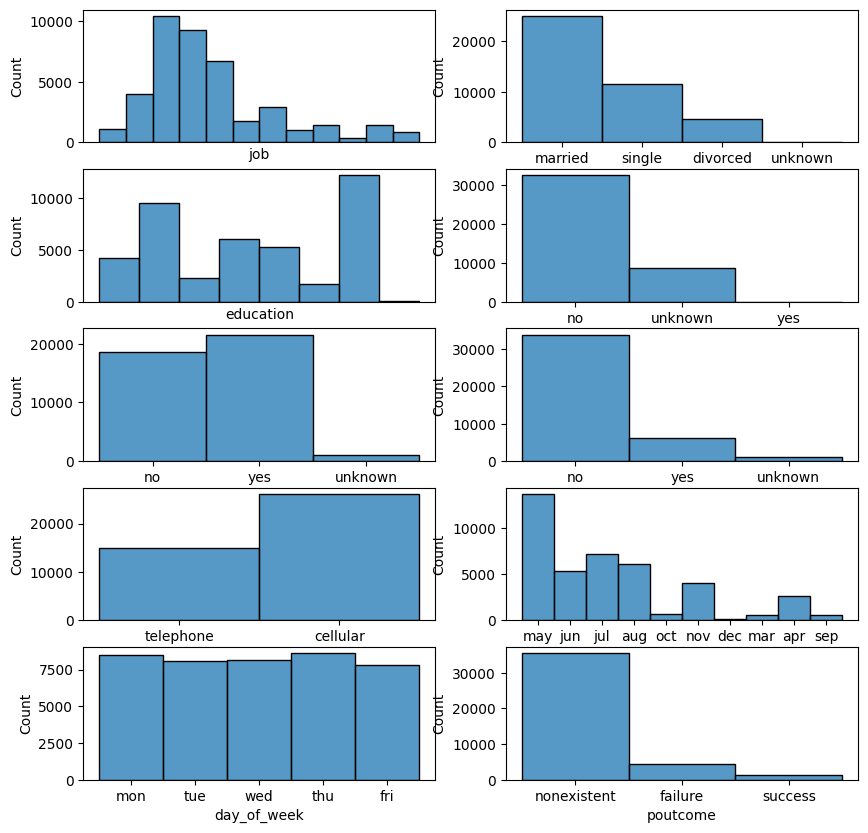

In [5]:
fig, axis = plt.subplots(5, 2, figsize=(10, 10))

sns.histplot(ax = axis [0,0], data = total_data, x = "job").set_xticks([])
sns.histplot(ax = axis [0,1], data = total_data, x = "marital")
sns.histplot(ax = axis [1,0], data = total_data, x = "education").set_xticks([])
sns.histplot(ax = axis [1,1], data = total_data, x = "default")
sns.histplot(ax = axis [2,0], data = total_data, x = "housing")
sns.histplot(ax = axis [2,1], data = total_data, x = "loan")
sns.histplot(ax = axis [3,0], data = total_data, x = "contact")
sns.histplot(ax = axis [3,1], data = total_data, x = "month")
sns.histplot(ax = axis [4,0], data = total_data, x = "day_of_week")
sns.histplot(ax = axis [4,1], data = total_data, x = "poutcome")

plt.show()

- Job = the most repeated jobs in the dataset are: admin, blue-collar and technician
- Marital: most people in dataset is married
- Education: most people have high school, basic 9y and university degrree level education
- Default: most people in the data have no credit
- Housing: most people have a mortgage loan on their home, but there are also many who do not
- Loan: most people have no personal loan
- Contact: most pf the contacts was by celullar
- Month: May is the month where there was the most of the contact, followed by July and August
- Day of the week: there are no significant differences between the days of the week that were contacted
- Poutcome: in the most of the cases, there weren't even an outcome, followed by failure in the campaign

- Numeric

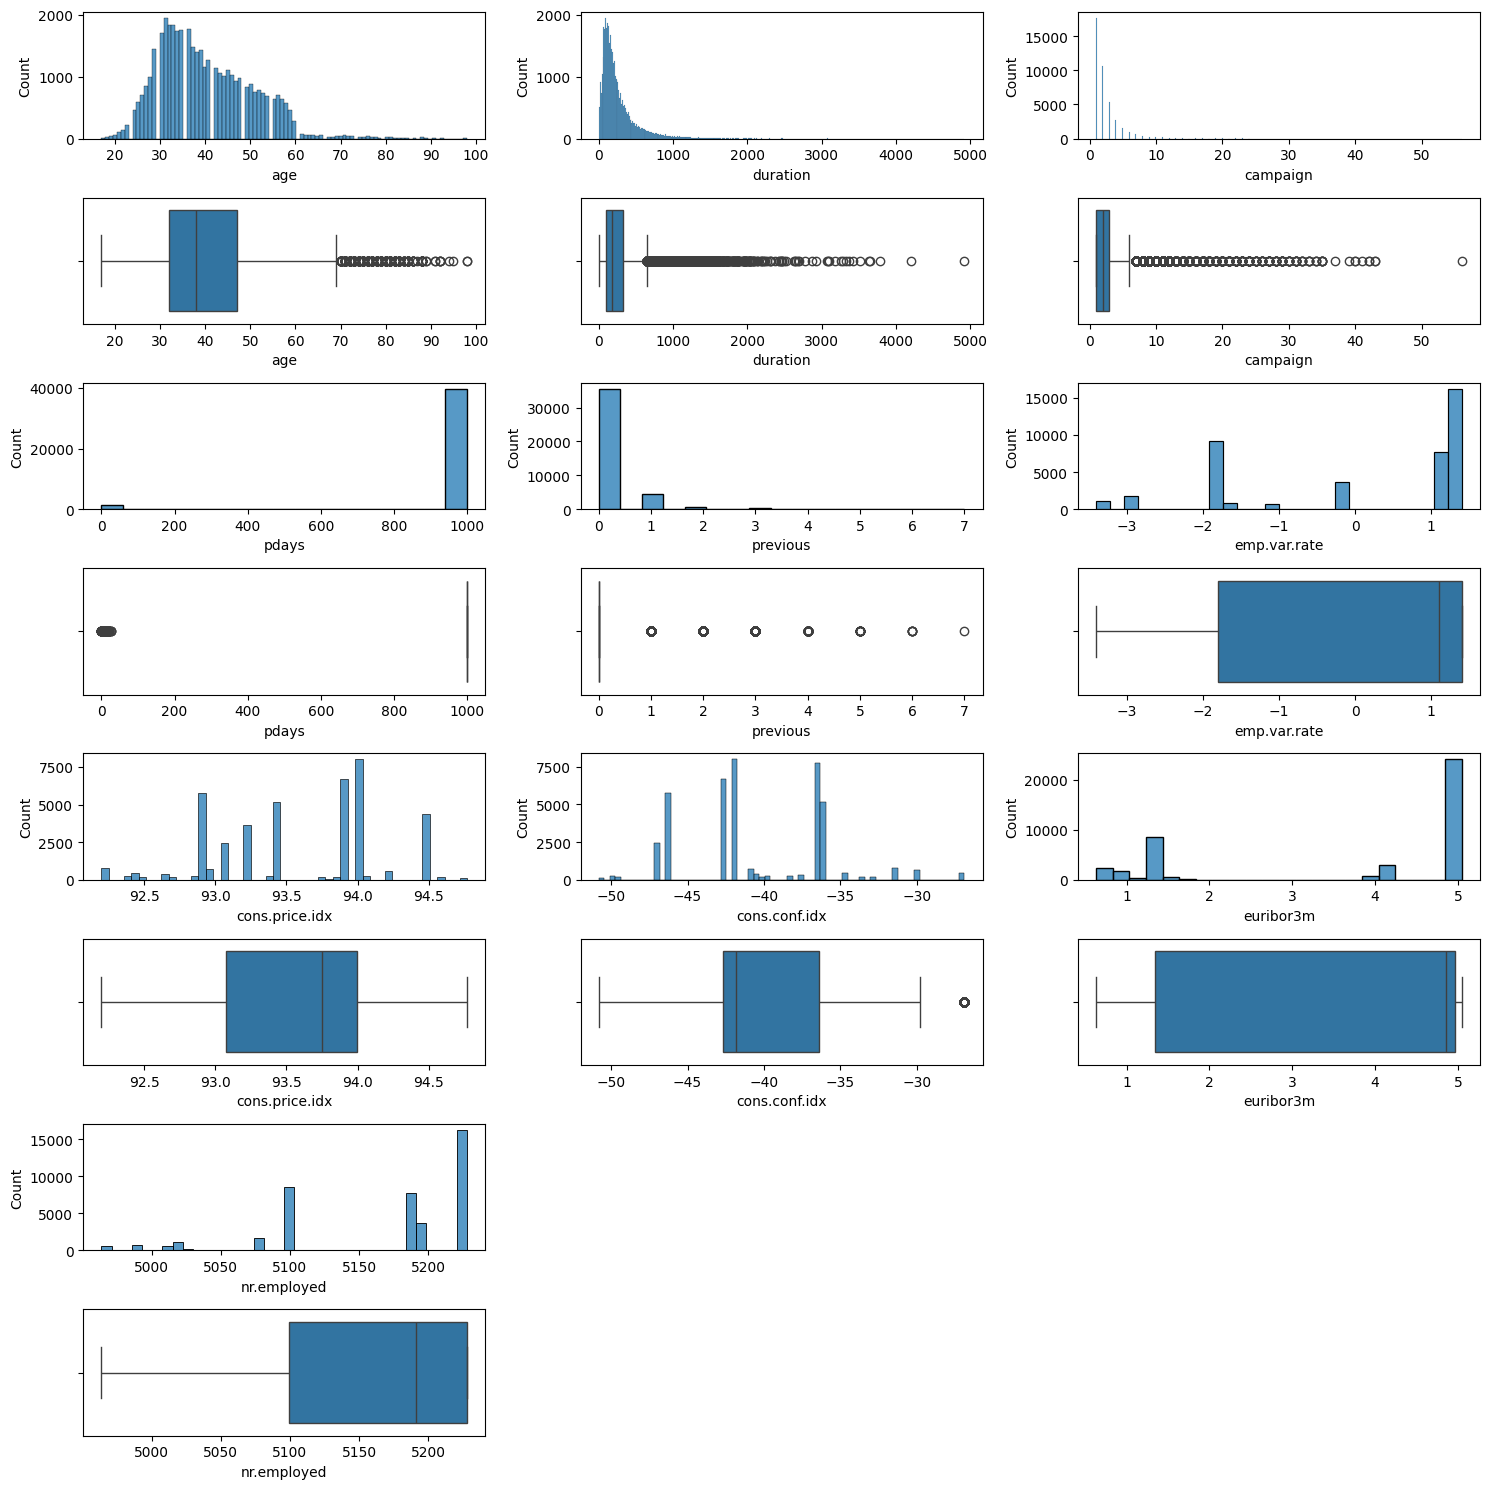

In [6]:
fig, axis = plt.subplots(8, 3, figsize = (15, 15))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "duration")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "duration")

sns.histplot(ax = axis[0, 2], data = total_data, x = "campaign")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "campaign")

sns.histplot(ax = axis[2, 0], data = total_data, x = "pdays")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "pdays")

sns.histplot(ax = axis[2, 1], data = total_data, x = "previous")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "previous")

sns.histplot(ax = axis[2, 2], data = total_data, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "emp.var.rate")

sns.histplot(ax = axis[4, 0], data = total_data, x = "cons.price.idx")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "cons.price.idx")

sns.histplot(ax = axis[4, 1], data = total_data, x = "cons.conf.idx")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "cons.conf.idx")

sns.histplot(ax = axis[4, 2], data = total_data, x = "euribor3m")
sns.boxplot(ax = axis[5, 2], data = total_data, x = "euribor3m")

sns.histplot(ax = axis[6, 0], data = total_data, x = "nr.employed")
sns.boxplot(ax = axis[7, 0], data = total_data, x = "nr.employed")

fig.delaxes(axis[6,1])
fig.delaxes(axis[7,1])
fig.delaxes(axis[6,2])
fig.delaxes(axis[7,2])


plt.tight_layout()
plt.show()

- Multiple outliers in : age, duration, campaign, pdays and previous

## Multivariant Analysis

In [7]:
#factorization of categorical variables

total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]


In [8]:
#save the factorization values in excel

total_data.drop_duplicates(["y", "y_n"])[["y", "y_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/y_to_y_n.xlsx", index = False)
total_data.drop_duplicates(["marital", "marital_n"])[["marital", "marital_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/marital_to_marital_n.xlsx", index = False)
total_data.drop_duplicates(["education", "education_n"])[["education", "education_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/education_to_education_n.xlsx", index = False)
total_data.drop_duplicates(["default", "default_n"])[["default", "default_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/default_to_default_n.xlsx", index = False)
total_data.drop_duplicates(["housing", "housing_n"])[["housing", "housing_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/housing_to_housing_n.xlsx", index = False)
total_data.drop_duplicates(["loan", "loan_n"])[["loan", "loan_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/loan_to_loan_n.xlsx", index = False)
total_data.drop_duplicates(["contact", "contact_n"])[["contact", "contact_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/contact_to_contact_n.xlsx", index = False)
total_data.drop_duplicates(["day_of_week", "day_of_week_n"])[["day_of_week", "day_of_week_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/day_of_week_to_day_of_week_n.xlsx", index = False)
total_data.drop_duplicates(["poutcome", "poutcome_n"])[["poutcome", "poutcome_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/poutcome_to_poutcome_n.xlsx", index = False)
total_data.drop_duplicates(["month", "month_n"])[["month", "month_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/month_to_month_n.xlsx", index = False)
total_data.drop_duplicates(["job", "job_n"])[["job", "job_n"]].to_excel("/workspaces/machine-learning-python-template-fertr/job_to_job_n.xlsx", index = False)

total_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


#### Numerical-numerical Analysis (age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, euribor3m, nr.employed, y_n)

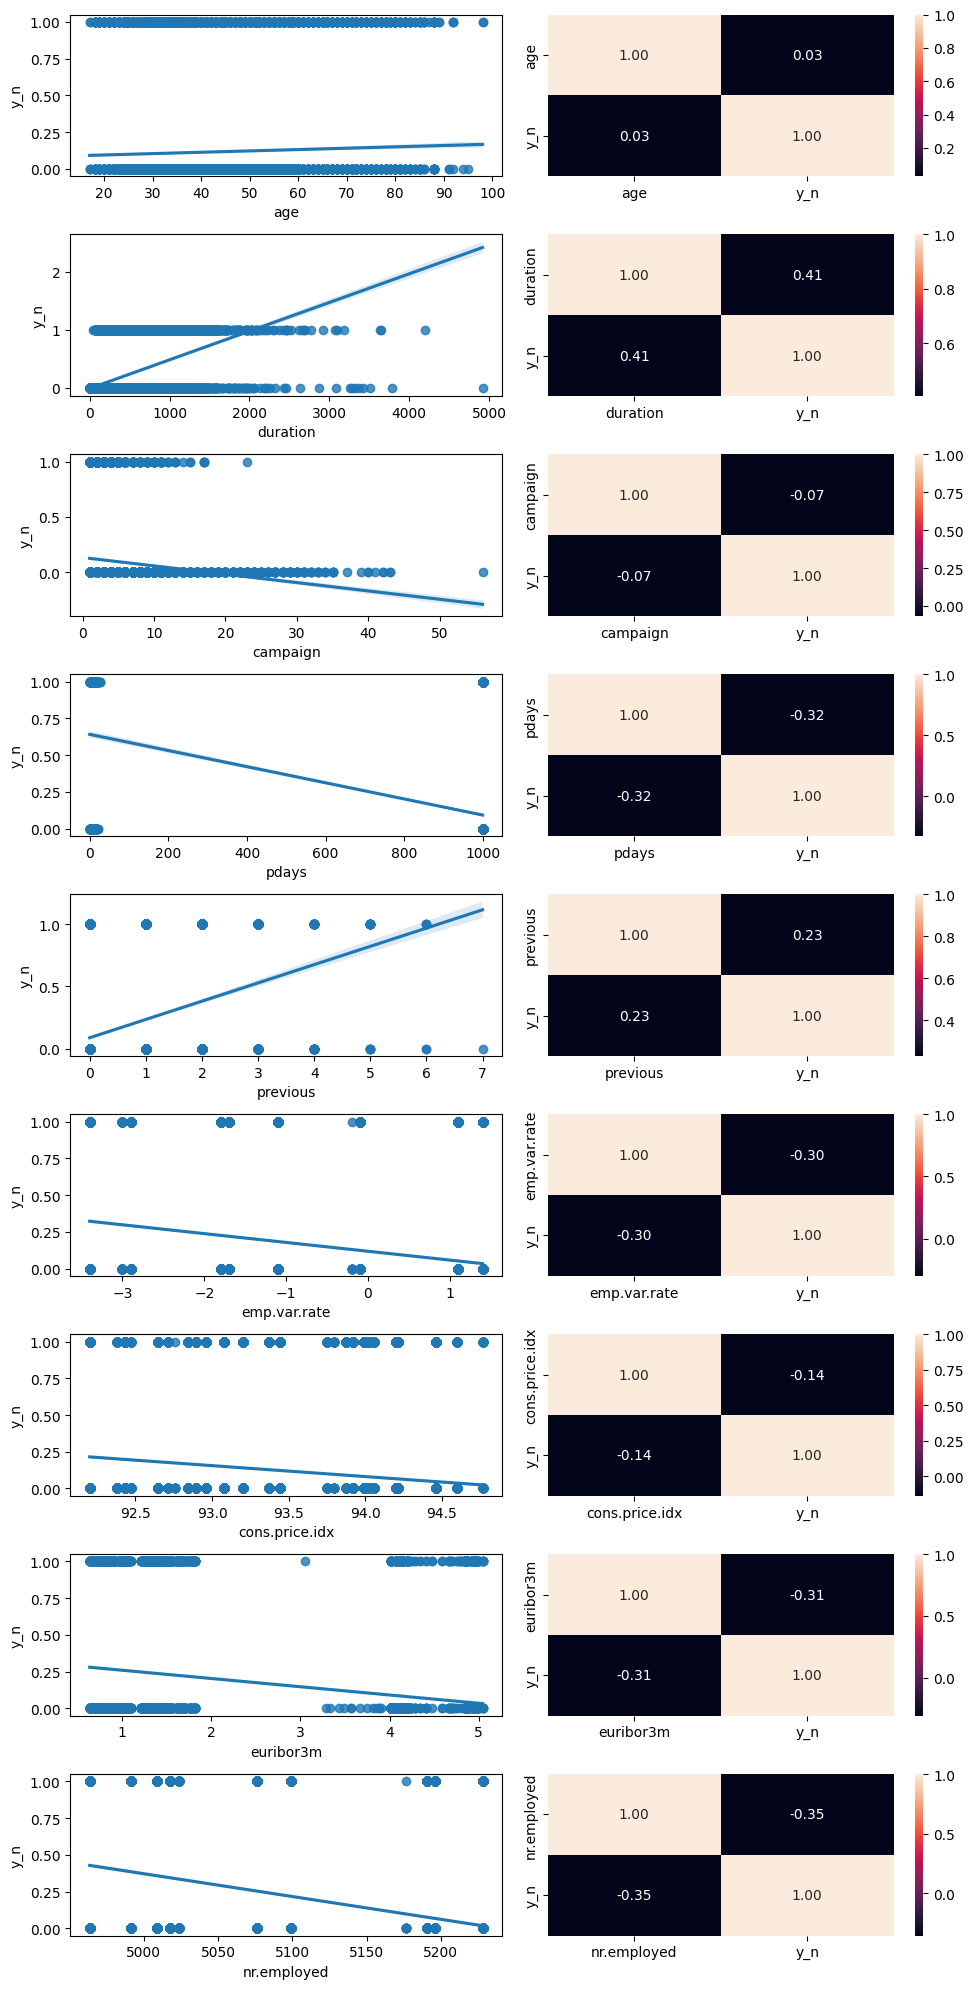

In [9]:
fig, axis = plt.subplots(9, 2, figsize = (10, 20))


sns.regplot(ax=axis[0,0], data= total_data, x= "age", y= "y_n")
sns.heatmap(total_data[["age", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[0,1])


sns.regplot(ax=axis[1,0], data= total_data, x= "duration", y= "y_n")
sns.heatmap(total_data[["duration", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[1,1])

sns.regplot(ax=axis[2,0], data= total_data, x= "campaign", y= "y_n")
sns.heatmap(total_data[["campaign", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[2,1])

sns.regplot(ax=axis[3,0], data= total_data, x= "pdays", y= "y_n")
sns.heatmap(total_data[["pdays", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[3,1])

sns.regplot(ax=axis[4,0], data= total_data, x= "previous", y= "y_n")
sns.heatmap(total_data[["previous", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[4,1])

sns.regplot(ax=axis[5,0], data= total_data, x= "emp.var.rate", y= "y_n")
sns.heatmap(total_data[["emp.var.rate", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[5,1])

sns.regplot(ax=axis[6,0], data= total_data, x= "cons.price.idx", y= "y_n")
sns.heatmap(total_data[["cons.price.idx", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[6,1])

sns.regplot(ax=axis[7,0], data= total_data, x= "euribor3m", y= "y_n")
sns.heatmap(total_data[["euribor3m", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[7,1])

sns.regplot(ax=axis[8,0], data= total_data, x= "nr.employed", y= "y_n")
sns.heatmap(total_data[["nr.employed", "y_n"]].corr(), annot= True, fmt= ".2f", ax= axis[8,1])

plt.tight_layout()
plt.show()

- Great positive relationship between "duration", "previous" and target(y_n)
- Great Negative relationship between "pdays", "emp.var.rate", "euribor3m", "nr.employed" and target (y_n)

#### Categoric-categoric analysis (job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y)

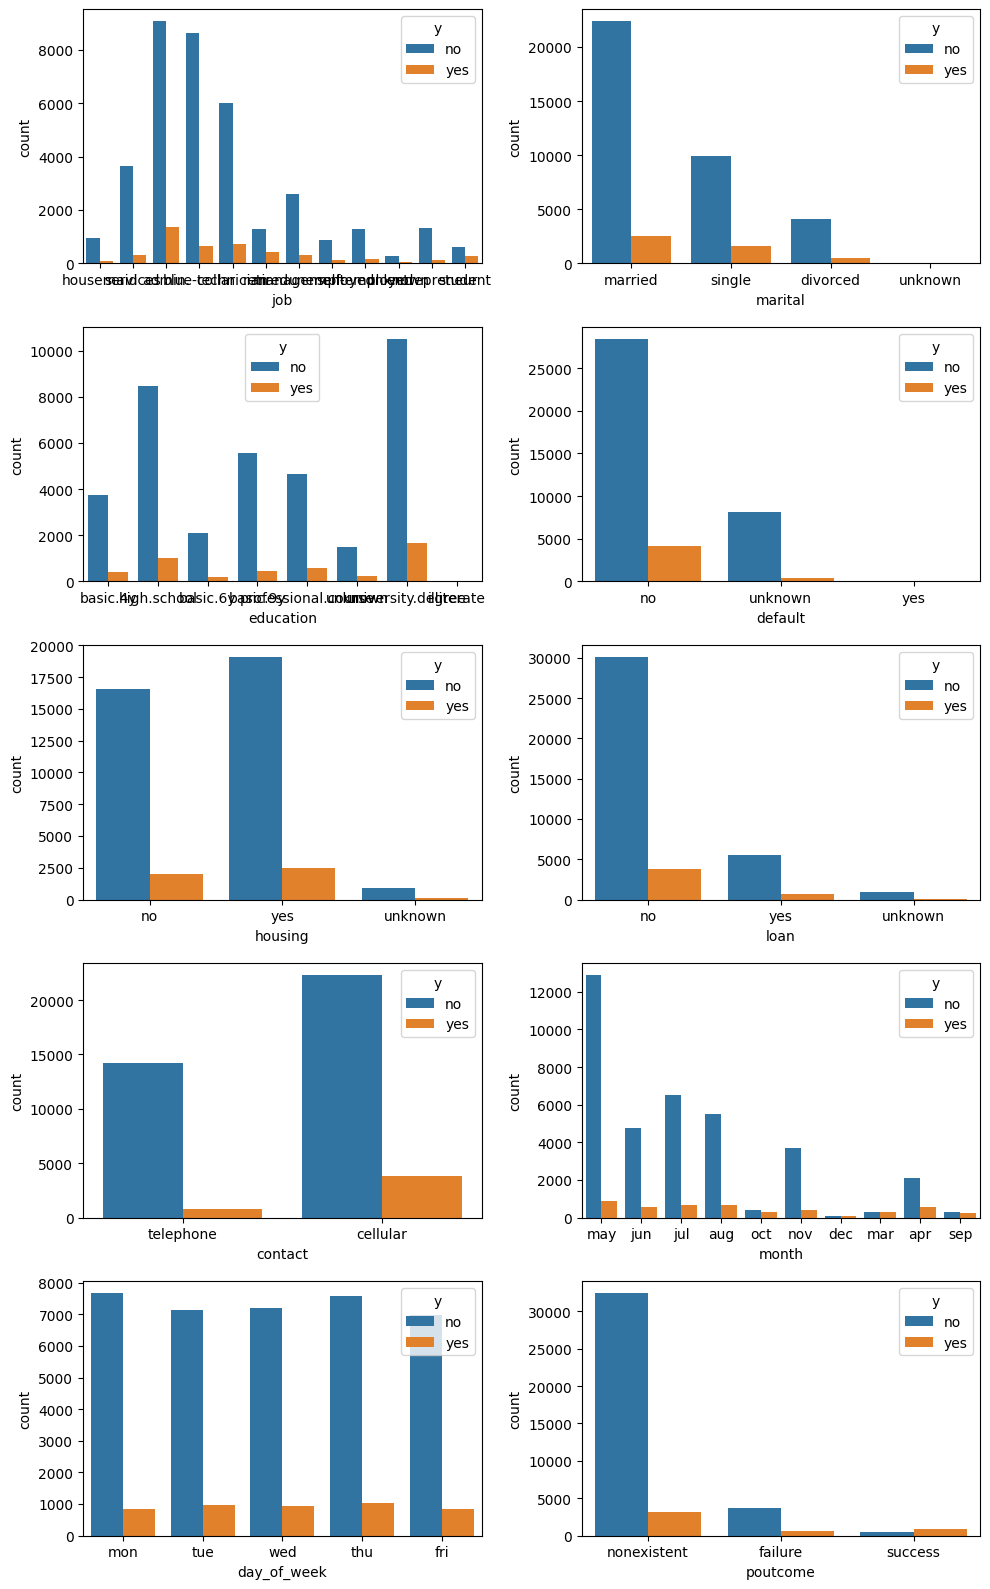

In [10]:
fig, axis = plt.subplots(5, 2, figsize = (10, 16))

sns.countplot(data = total_data, x = "job", hue = "y", ax= axis[0,0])
sns.countplot(data = total_data, x = "marital", hue = "y", ax= axis[0,1])
sns.countplot(data = total_data, x = "education", hue = "y", ax= axis[1,0])
sns.countplot(data = total_data, x = "default", hue = "y", ax= axis[1,1])
sns.countplot(data = total_data, x = "housing", hue = "y", ax= axis[2,0])
sns.countplot(data = total_data, x = "loan", hue = "y", ax= axis[2,1])
sns.countplot(data = total_data, x = "contact", hue = "y", ax= axis[3,0])
sns.countplot(data = total_data, x = "month", hue = "y", ax= axis[3,1])
sns.countplot(data = total_data, x = "day_of_week", hue = "y", ax= axis[4,0])
sns.countplot(data = total_data, x = "poutcome", hue = "y", ax= axis[4,1])

plt.tight_layout()
plt.show()

- Most of the people who agreed to enter this campaign had:

     a job like: admin, blue-collar and technician,

     marital: married people

     education: university degree or high school

     default: had no credit

     housing: no significant differences between having or not a house loan

     loan: had no personal loan

     contact: had a cellular contact

     month: entered in May, June, July, August or April

     day_of_week: no significant differences in the contact day between the days of the week
     
     poutcome: didn't entered in the last campaign


#### Categorical-Numerical Analysis

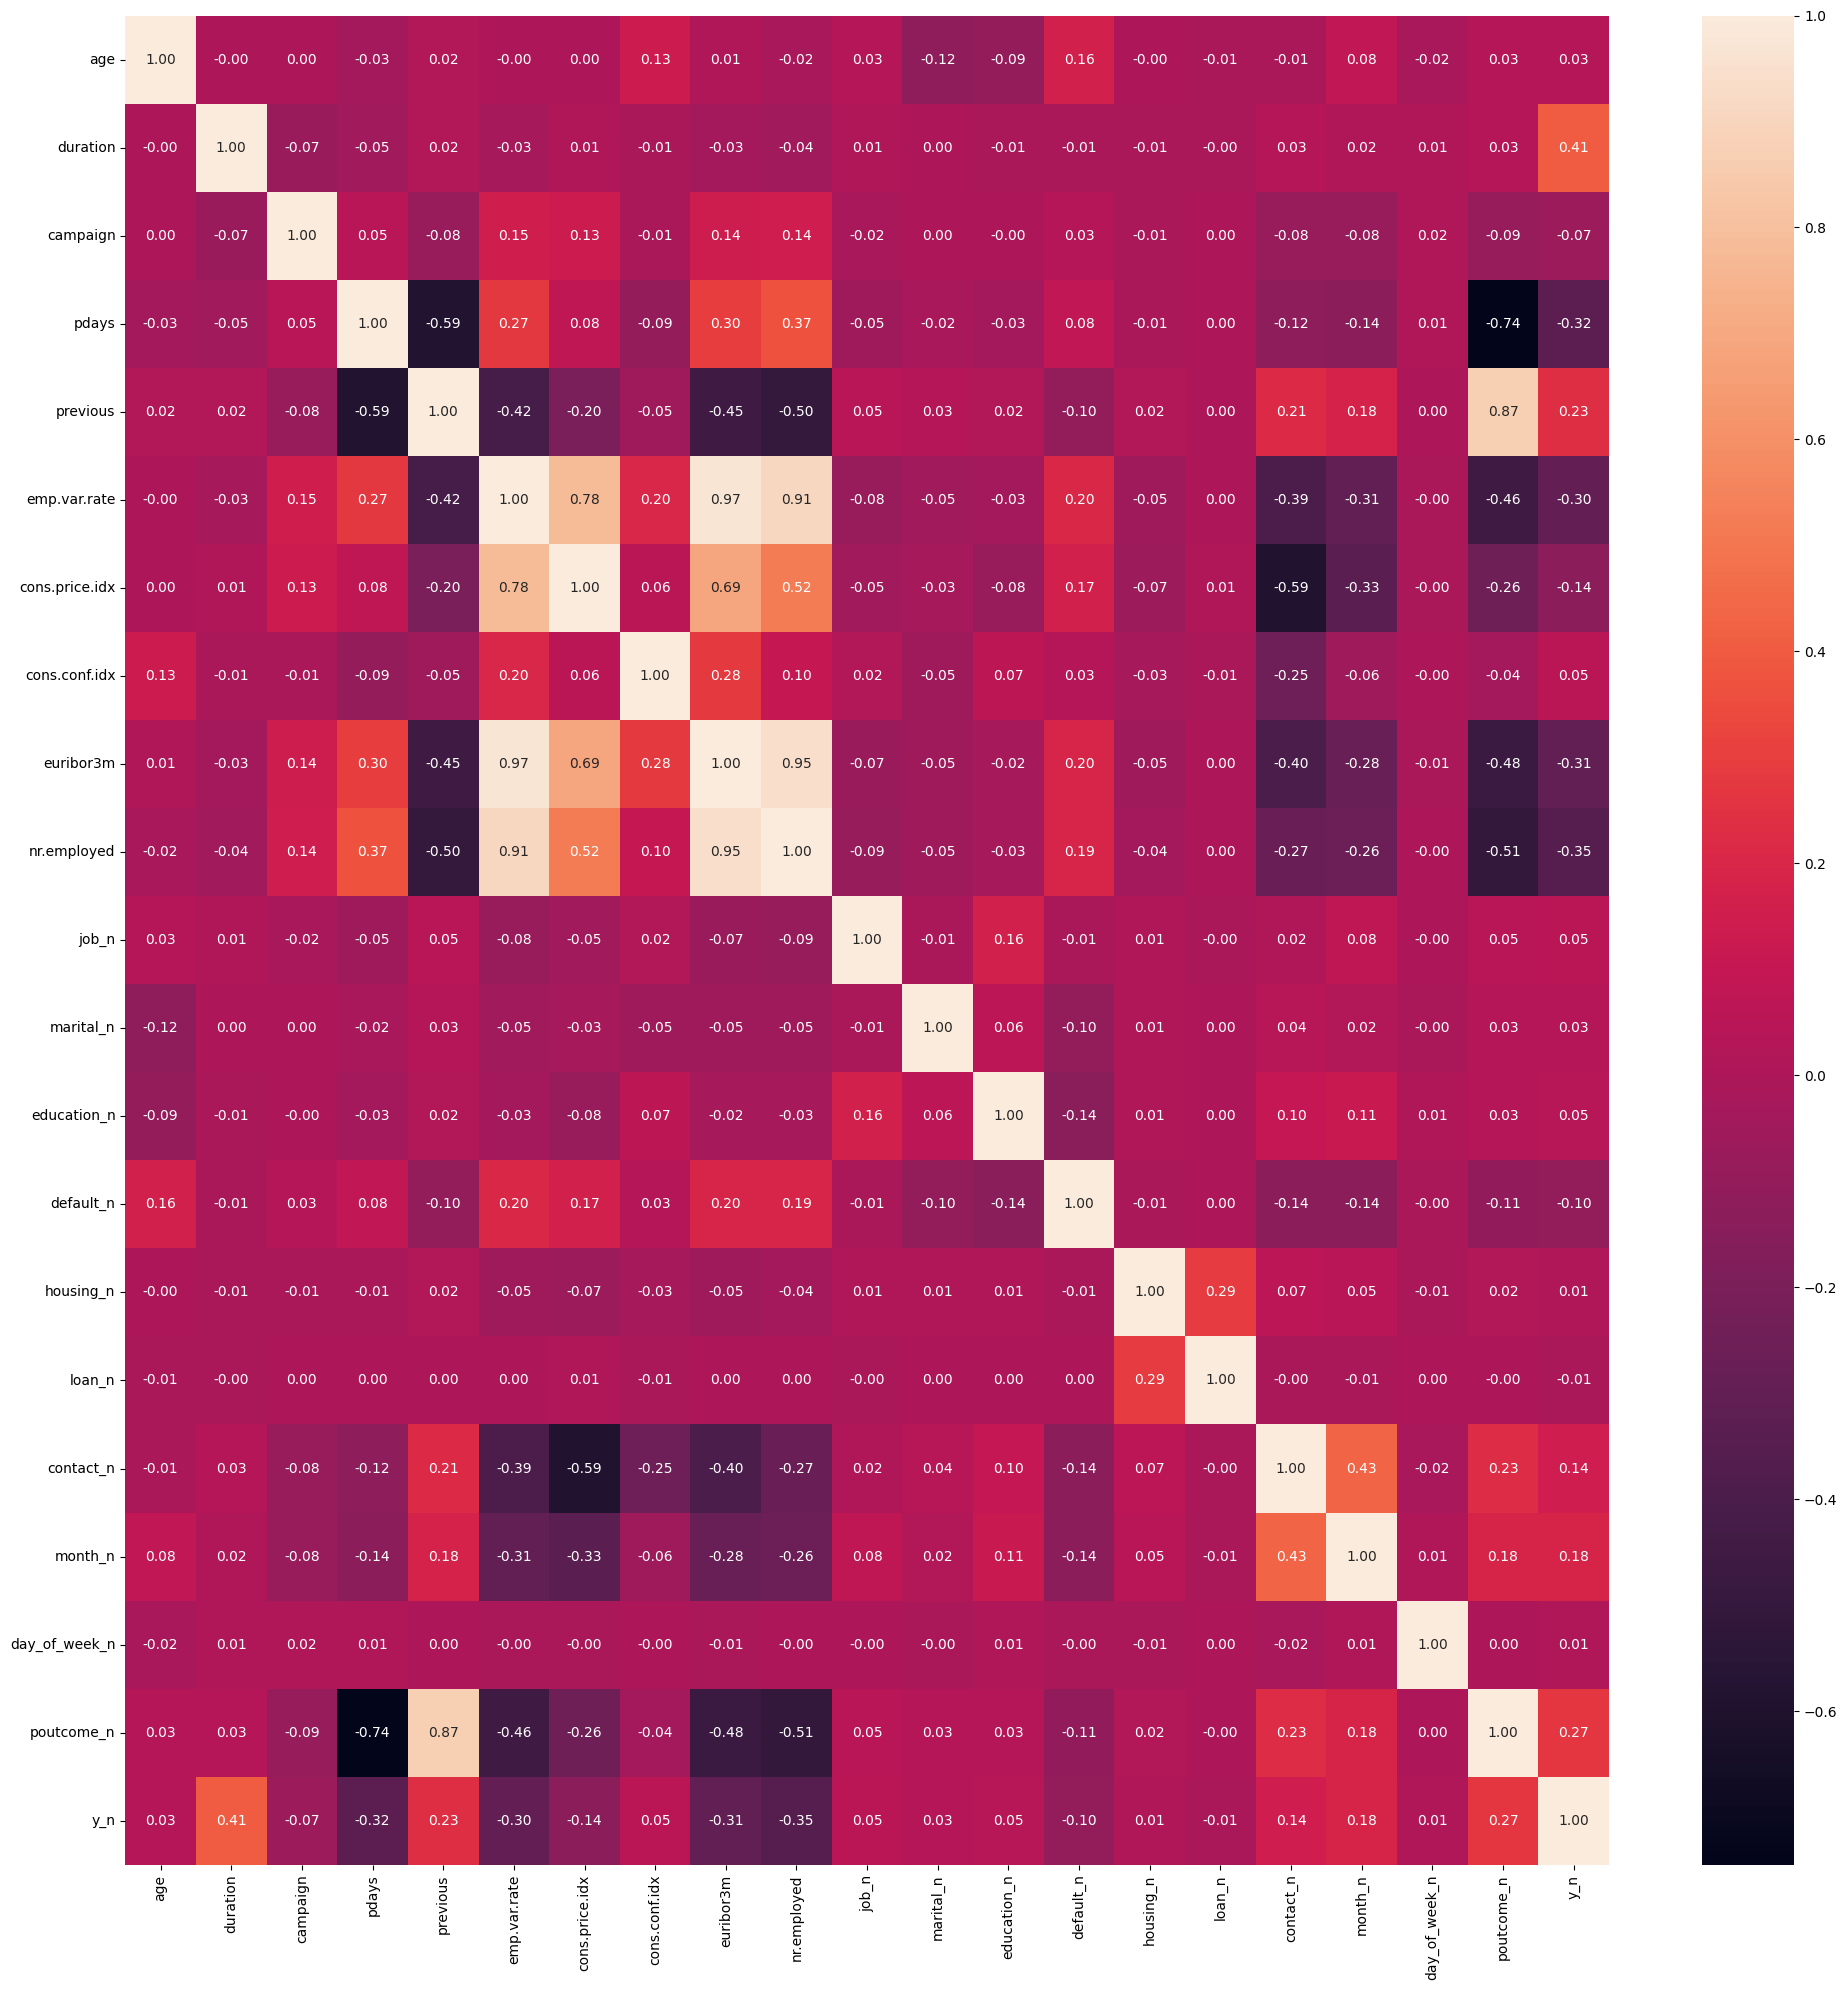

In [11]:
fig, axis = plt.subplots(figsize = (20, 20))

sns.heatmap(total_data[['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_n', 'marital_n',
       'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n',
       'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

## Feature engineering

#### Outliers Analysis

In [12]:
total_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


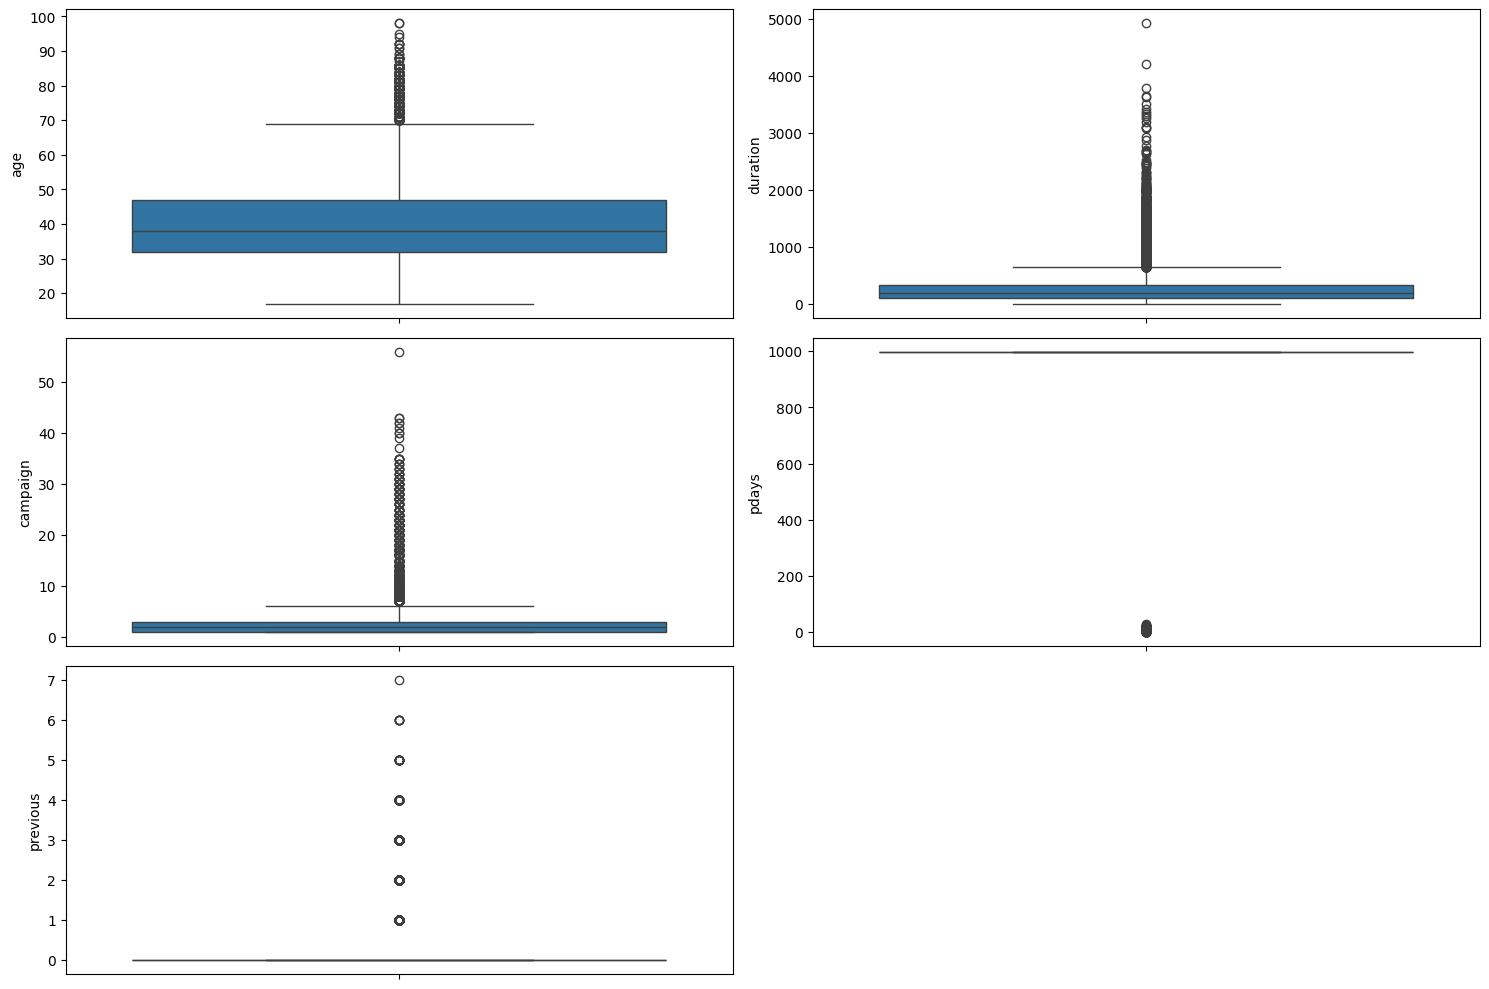

In [13]:
fig, axis = plt.subplots(3, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "duration")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "campaign")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "pdays")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "previous")

fig.delaxes(axis[2, 1])

plt.tight_layout()

plt.show()


#### Outliers imputation

In [14]:
#data with outliers
outliers_data = total_data.copy()
outliers_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


In [15]:
#data without ouliers
no_outliers_data = outliers_data.copy()
no_outliers_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0


In [16]:
describe_age = no_outliers_data['age'].describe()
describe_age

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [17]:
age_mode = no_outliers_data['age'].mode()
age_mode

0    31
Name: age, dtype: int64

In [18]:
age_iqr = describe_age["75%"] - describe_age["25%"]
upper_limit = describe_age["75%"] + 1.5 * age_iqr
lower_limit = describe_age["25%"] - 1.5 * age_iqr
lower_limit = 17
print(f"lower limit for finding outliers: {round(lower_limit, 2)} \nupper limit for finding outliers: {round(upper_limit, 2)}\nIQR: {round(age_iqr, 2)}")
age_outliers = no_outliers_data[no_outliers_data["age"] <= upper_limit]
age_outliers

lower limit for finding outliers: 17 
upper limit for finding outliers: 69.5
IQR: 15.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,1
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,0,0,1,0,1,5,4,2,0
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0


In [19]:
duration_describe = no_outliers_data['duration'].describe()
duration_describe

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [20]:
duration_mode = no_outliers_data['duration'].mode().iloc[0]
duration_mode

85

In [21]:
duration_iqr = duration_describe["75%"] - duration_describe["25%"]
upper_limit1 = duration_describe["75%"] + 1.5 * duration_iqr
lower_limit1 = duration_describe["25%"] - 1.5 * duration_iqr
lower_limit1 = 0
print(f"lower limit for finding outliers: {round(lower_limit1, 2)} \nupper limit for finding outliers: {round(upper_limit1, 2)}\nIQR: {round(duration_iqr, 2)}")
duration_outliers = no_outliers_data[no_outliers_data["duration"] <= upper_limit1]
duration_outliers

lower limit for finding outliers: 0 
upper limit for finding outliers: 644.5
IQR: 217.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


In [22]:
describe_campaign = no_outliers_data['campaign'].describe()
describe_campaign

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [23]:
campaign_mode = no_outliers_data['campaign'].mode().iloc[0]
campaign_mode

1

In [24]:
campaign_iqr = describe_campaign["75%"] - describe_campaign["25%"]
upper_limit2 = describe_campaign["75%"] + 1.5 * campaign_iqr
lower_limit2 = describe_campaign["25%"] - 1.5 * campaign_iqr
lower_limit2 = 1
print(f"lower limit for finding outliers: {round(lower_limit2, 2)} \nupper limit for finding outliers: {round(upper_limit2, 2)}\nIQR: {round(campaign_iqr, 2)}")
campaign_outliers = no_outliers_data[no_outliers_data["campaign"] <= upper_limit2]
campaign_outliers

lower limit for finding outliers: 1 
upper limit for finding outliers: 6.0
IQR: 2.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


In [25]:
describe_pdays = no_outliers_data['pdays'].describe()
describe_pdays

count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [26]:
pdays_iqr = describe_pdays["75%"] - describe_pdays["25%"]
upper_limit3 = describe_pdays["75%"] + 1.5 * pdays_iqr
lower_limit3 = describe_pdays["25%"] - 1.5 * pdays_iqr
#lower_limit3 = 1
print(f"lower limit for finding outliers: {round(lower_limit3, 2)} \nupper limit for finding outliers: {round(upper_limit3, 2)}\nIQR: {round(pdays_iqr, 2)}")
pdays_outliers = no_outliers_data[no_outliers_data["pdays"] >= upper_limit3]
pdays_outliers

lower limit for finding outliers: 999.0 
upper limit for finding outliers: 999.0
IQR: 0.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


In [27]:
describe_previous = no_outliers_data['previous'].describe()
describe_previous

count    41176.000000
mean         0.173013
std          0.494964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [28]:
mode_previous = no_outliers_data['previous'].mode()
mode_previous

0    0
Name: previous, dtype: int64

In [29]:
previous_iqr = describe_previous["75%"] - describe_previous["25%"]
upper_limit4 = describe_previous["75%"] + 1.5 * previous_iqr
lower_limit4 = describe_previous["25%"] - 1.5 * previous_iqr
#lower_limit3 = 1
print(f"lower limit for finding outliers: {round(lower_limit4, 2)} \nupper limit for finding outliers: {round(upper_limit4, 2)}\nIQR: {round(previous_iqr, 2)}")
previous_outliers = no_outliers_data[no_outliers_data["previous"] >= upper_limit4]
previous_outliers

lower limit for finding outliers: 0.0 
upper limit for finding outliers: 0.0
IQR: 0.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


#### Outliers imputation values

In [30]:
no_outliers_data['age'] = no_outliers_data['age'].apply(lambda x: 31 if x > 70 else x)

In [31]:
no_outliers_data['duration'] = no_outliers_data['duration'].apply(lambda x: 85 if x > 645 else x)

In [32]:
no_outliers_data['campaign'] = no_outliers_data['campaign'].apply(lambda x: 1 if x > 6 else x)

In [33]:
no_outliers_data['pdays'] = no_outliers_data['pdays'].apply(lambda x: 999 if x < 999 else x)

In [34]:
no_outliers_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,31,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


#### Feature Scaling

In [35]:
from sklearn.model_selection import train_test_split

predictors = ['age', 'duration', 'campaign', 'pdays', 
              'previous', 'emp.var.rate', 'cons.price.idx', 
              'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_n', 'marital_n', 
              'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 
              'month_n', 'day_of_week_n', 'poutcome_n']
target = 'y_n'

X = outliers_data[predictors]
y = outliers_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#data with outliers no scaled
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
7107,59,200,4,999,0,1.1,93.994,-36.4,4.860,5191.0,10,0,3,0,0,0,0,0,3,0
31599,31,1957,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,3,0,3,0,1,0,1,0,3,0
21640,32,40,1,999,0,1.4,93.444,-36.1,4.963,5228.1,2,1,6,0,2,2,1,3,1,0
24593,42,295,2,999,1,-0.1,93.200,-42.0,4.191,5195.8,2,2,1,0,2,2,1,5,0,1
31466,44,206,2,999,0,-1.8,92.893,-46.2,1.334,5099.1,7,0,3,0,1,0,1,0,2,0


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictors)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictors)

#data with outliers scaled MinMax
X_train_scal.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
7107,0.518519,0.040667,0.071429,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,0.909091,0.000000,0.428571,0.0,0.0,0.0,0.0,0.000000,0.75,0.0
31599,0.172840,0.397926,0.000000,1.0,0.000000,0.333333,0.269680,0.192469,0.157107,0.512287,0.272727,0.000000,0.428571,0.0,0.5,0.0,1.0,0.000000,0.75,0.0
21640,0.185185,0.008133,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,0.181818,0.333333,0.857143,0.0,1.0,1.0,1.0,0.333333,0.25,0.0
24593,0.308642,0.059984,0.023810,1.0,0.142857,0.687500,0.389322,0.368201,0.806393,0.877883,0.181818,0.666667,0.142857,0.0,1.0,1.0,1.0,0.555556,0.00,0.5
31466,0.333333,0.041887,0.023810,1.0,0.000000,0.333333,0.269680,0.192469,0.158694,0.512287,0.636364,0.000000,0.428571,0.0,0.5,0.0,1.0,0.000000,0.50,0.0


In [37]:
X_train.to_excel("/workspaces/machine-learning-python-template-fertr/data/processed/data_with_outliers_no_scaled.xlsx", index = False)
X_train_scal.to_excel("/workspaces/machine-learning-python-template-fertr/data/processed/data_with_outliers_scaled.xlsx", index = False)

#### Feature Selection

In [38]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed,poutcome_n
0,200.0,999.0,1.1,4.860,5191.0,0.0
1,1957.0,999.0,-1.8,1.327,5099.1,0.0
2,40.0,999.0,1.4,4.963,5228.1,0.0
3,295.0,999.0,-0.1,4.191,5195.8,1.0
4,206.0,999.0,-1.8,1.334,5099.1,0.0


In [39]:
X_test_sel.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed,poutcome_n
0,1460.0,999.0,-2.9,1.266,5076.2,0.0
1,248.0,999.0,-1.8,1.299,5099.1,1.0
2,275.0,999.0,-1.1,0.959,4963.6,0.0
3,186.0,999.0,-1.8,1.299,5099.1,1.0
4,184.0,999.0,1.4,4.963,5228.1,0.0


In [40]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

## Trainning the model

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9056099732858415

In [44]:
model = LogisticRegression()
model.fit(X_train_scal, y_train)

y_pred = model.predict(X_test_scal)

accuracy_score(y_test, y_pred)

0.9051242613130414

#### Optimization Model

In [47]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [48]:
random_search.fit(X_train_scal, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'C': 545.5594781168514}


In [50]:
model_random_search = LogisticRegression(penalty = "l2", C = 545.5594781168514, solver = "saga")
model_random_search.fit(X_train_scal, y_train)
y_pred = model_random_search.predict(X_test_scal)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9056909252813082

final optimization = 90.56 %